In [ ]:
# General Links

# 1: Github Repo: https://github.com/addzy94/data-mining-anime-recommendations

In [ ]:
# Links Referred

# 1: Data: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database
# 2: Clustering: https://www.kaggle.com/code/ajmichelutti/collaborative-filtering-on-anime-data

In [ ]:
# Display Properties
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Set Working Directory
%cd "drive/MyDrive/Data Mining Project"

/content/drive/.shortcut-targets-by-id/1z8D9-G1NBbpU3cKVnoeF6OryM9p1aHM9/Data Mining Project


In [ ]:
# Basic Imports
import pandas as pd
import numpy as np

In [ ]:
# Reading the Data
anime = pd.read_csv("data/anime.csv")
ratings = pd.read_csv("data/rating.csv")

In [ ]:
# Replace values which have -1 (not rated) in rating with NaN
ratings.rating.replace({-1: np.nan}, regex=True, inplace=True)

In [ ]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [ ]:
len(anime[anime['episodes'] == 'Unknown'])

340

In [ ]:
# Considering only TV category
anime_tv = anime[anime.type == 'TV']
anime_tv.head()

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351


# Integration

In [ ]:
# Joining the Dataframes
merged = ratings.merge(anime_tv, left_on='anime_id',
                       right_on='anime_id', suffixes=['_user', ''])
merged.rename(columns={'rating_user':'user_rating',
                       'rating':'average_rating'}, inplace=True)
merged.head()

,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [ ]:
len(merged[merged['episodes'] == 'Unknown'])

3

In [ ]:
filter = merged['episodes'] != 'Unknown'
merged = merged[filter]
merged['episodes'] = merged['episodes'].apply(lambda x: int(x))
merged

,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
5283591,53492,31071,3.0,"Kinyoru, Abe Reiji: Heikinteki na Salaryman no...",Comedy,TV,5,4.14,234
5283592,53492,31177,4.0,Yakyuubu Aruaru,Sports,TV,3,4.00,149
5283593,53492,31237,5.0,Ganbare-bu Next!,"Comedy, Sports",TV,6,5.36,70
5283594,53492,31464,3.0,Pichiko Dakyuubu,"Comedy, Sports",TV,29,5.00,39


In [ ]:
len(merged)

5283593

In [ ]:
# Getting on user information with anime name and limiting user_id's to < 15000
merged_user = merged[['user_id', 'name', 'user_rating']]
merged_lim = merged_user[merged_user.user_id < 15000]
merged_lim.shape

(1051767, 3)

In [ ]:
merged_lim

,user_id,name,user_rating
0,1,Naruto,NaN
1,3,Naruto,8.0
2,5,Naruto,6.0
3,6,Naruto,NaN
4,10,Naruto,NaN
...,...,...,...
5282288,13877,Lovely Movie: Itoshi no Muco Season 2,3.0
5282291,13954,Neko nanka Yondemo Konai.,5.0
5282294,14061,Meshimase Lodoss-tou Senki: Sorette Oishii no?,NaN
5282302,14314,MonHun Nikki Girigiri Airou Mura: Airou Kiki I...,5.0


In [ ]:
pivot_df = merged_lim.pivot_table(index=['user_id'], columns=['name'], values='user_rating')
pivot_df.shape
pivot_df.head()

(14053, 2810)

name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,009-1,07-Ghost,11eyes,12-sai.: Chicchana Mune no Tokimeki,3 Choume no Tama: Uchi no Tama Shirimasenka?,30-sai no Hoken Taiiku,91 Days,...,"Zone of the Enders: Dolores, I",Zukkoke Knight: Don De La Mancha,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(anime)

12294

In [ ]:
ratings[ratings.rating.isna() == False]

,user_id,anime_id,rating
47,1,8074,10.0
81,1,11617,10.0
83,1,11757,10.0
101,1,15451,10.0
153,2,11771,10.0
...,...,...,...
7813732,73515,16512,7.0
7813733,73515,17187,9.0
7813734,73515,22145,10.0
7813735,73516,790,9.0


In [ ]:
merged.describe()

,user_id,anime_id,user_rating,episodes,average_rating,members
count,5.283593e+06,5.283593e+06,4.364293e+06,5.283593e+06,5.283593e+06,5.283593e+06
mean,3.660319e+04,9.670233e+03,7.899162e+00,2.611707e+01,7.738968e+00,2.309265e+05
std,2.104968e+04,9.241436e+03,1.524177e+00,4.035161e+01,6.269623e-01,2.020517e+05
min,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.250000e+00,2.900000e+01
25%,1.877700e+04,1.535000e+03,7.000000e+00,1.200000e+01,7.360000e+00,8.110900e+04
50%,3.635000e+04,6.880000e+03,8.000000e+00,1.300000e+01,7.760000e+00,1.713840e+05
75%,5.475800e+04,1.558300e+04,9.000000e+00,2.500000e+01,8.180000e+00,3.175130e+05
max,7.351600e+04,3.435800e+04,1.000000e+01,1.818000e+03,9.260000e+00,1.013917e+06


# Outlier removal


*   Remove users who have rated the same for all animes
*   Remove users with no rating or NAN in the merged table
*   Correction of illegal values




# Modeling

* K-Means Clustering - Varying values of 'k' for the rating and members column

* Regression Model - Linear regression with all columns as features and rating as response variable

In [ ]:
reg_df = merged[['name', 'genre', 'episodes', 'members', 'average_rating']]
reg_df = reg_df.drop_duplicates()
reg_df

,name,genre,episodes,members,average_rating
0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",220,683297,7.81
25925,School Rumble,"Comedy, Romance, School, Shounen",26,178553,8.06
33078,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",24,158772,7.31
40190,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",13,623511,7.85
67696,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",11,84395,6.69
...,...,...,...,...,...
5283591,"Kinyoru, Abe Reiji: Heikinteki na Salaryman no...",Comedy,5,234,4.14
5283592,Yakyuubu Aruaru,Sports,3,149,4.00
5283593,Ganbare-bu Next!,"Comedy, Sports",6,70,5.36
5283594,Pichiko Dakyuubu,"Comedy, Sports",29,39,5.00


In [ ]:
def make_genre_list(df_col):
  res = list()
  for ele in df_col.split(','):
    res.append(ele.strip())

  return res

In [ ]:
reg_df.genre = reg_df.genre.apply(make_genre_list)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
reg_df.genre = reg_df.genre.apply(lambda x: set(x))
reg_df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,name,genre,episodes,members,average_rating
0,Naruto,"{Shounen, Comedy, Martial Arts, Action, Super ...",220,683297,7.81
25925,School Rumble,"{Shounen, Comedy, Romance, School}",26,178553,8.06
33078,Shuffle!,"{Comedy, Romance, Harem, Magic, Fantasy, Drama...",24,158772,7.31
40190,Elfen Lied,"{Romance, Psychological, Supernatural, Drama, ...",13,623511,7.85
67696,Girls Bravo: First Season,"{Comedy, Romance, Harem, Fantasy, Ecchi, School}",11,84395,6.69
...,...,...,...,...,...
5283591,"Kinyoru, Abe Reiji: Heikinteki na Salaryman no...",{Comedy},5,234,4.14
5283592,Yakyuubu Aruaru,{Sports},3,149,4.00
5283593,Ganbare-bu Next!,"{Comedy, Sports}",6,70,5.36
5283594,Pichiko Dakyuubu,"{Comedy, Sports}",29,39,5.00


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = {}
res = {}
mlb = MultiLabelBinarizer()
multi_hot = mlb.fit_transform(list(reg_df.genre))


In [ ]:
mlb.classes_

array(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons',
       'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Historical',
       'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha',
       'Military', 'Music', 'Mystery', 'Parody', 'Police',
       'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi',
       'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai',
       'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural',
       'Thriller', 'Vampire'], dtype=object)

In [ ]:
multi_hot_df = pd.DataFrame(multi_hot, columns = mlb.classes_)
multi_hot_df

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3396,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3397,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
multi_hot_df['episodes'] = list(reg_df.episodes)
multi_hot_df['members'] = list(reg_df.members)
multi_hot_df['average_rating'] = list(reg_df.average_rating)
multi_hot_df

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,episodes,members,average_rating
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,220,683297,7.81
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,26,178553,8.06
2,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,24,158772,7.31
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,13,623511,7.85
4,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,11,84395,6.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,234,4.14
3395,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,3,149,4.00
3396,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,6,70,5.36
3397,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,29,39,5.00


(array([   6.,   10.,   37.,  137.,  339.,  963., 1026.,  611.,  236.,
          34.]),
 array([3.25 , 3.851, 4.452, 5.053, 5.654, 6.255, 6.856, 7.457, 8.058,
        8.659, 9.26 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'average_rating')

Text(0, 0.5, 'frequency')

Text(0.5, 1.0, 'average_rating distribution')

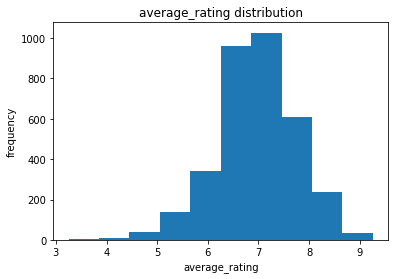

In [ ]:
import matplotlib.pyplot as plt

plt.hist(multi_hot_df['average_rating'])
plt.xlabel('average_rating')
plt.ylabel('frequency')
plt.title('average_rating distribution')

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = multi_hot_df.loc[:, multi_hot_df.columns != 'average_rating'].to_numpy()
y = multi_hot_df.loc[:, multi_hot_df.columns == 'average_rating'].to_numpy()

X_transformed = scaler.fit_transform(X)

reg = LinearRegression().fit(X_transformed, y)
reg.score(X_transformed, y)

0.4108452636322476

# Data preprocessing


*   Add a popularity column based on fanbase count
*   One hot encode the genre column

In [ ]:
thresholds = np.percentile(merged['members'], [0, 25, 75, 90, 100])

def calculate_popularity(x, type = 'str'):
  if type == 'str':
    if x >= thresholds[0] and x <= thresholds[1]:
      return 'Low Popularity'
    elif x > thresholds[1] and x <= thresholds[2]:
      return 'Moderate Popularity'
    elif x > thresholds[3] and x <= thresholds[4]:
      return 'Mainstream'
    return 'Highly Popular'

  if type == 'numeric':
    if x >= thresholds[0] and x <= thresholds[1]:
      return 1
    elif x > thresholds[1] and x <= thresholds[2]:
      return 2
    elif x > thresholds[3] and x <= thresholds[4]:
      return 3
    return 4

import numpy as np

# 1: least popular
# 2: not very popular
# 3: popular
# 4: very popular

multi_hot_df['popularity'] = multi_hot_df['members'].apply(calculate_popularity)
multi_hot_df

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Space,Sports,Super Power,Supernatural,Thriller,Vampire,episodes,members,average_rating,popularity
0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,220,683297,7.81,Mainstream
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,26,178553,8.06,Moderate Popularity
2,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,24,158772,7.31,Moderate Popularity
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,13,623511,7.85,Mainstream
4,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,11,84395,6.69,Moderate Popularity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,5,234,4.14,Low Popularity
3395,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,3,149,4.00,Low Popularity
3396,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,6,70,5.36,Low Popularity
3397,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,29,39,5.00,Low Popularity


# Correlation Analysis

In [ ]:
col_len = len(multi_hot_df.columns)
cols = list(multi_hot_df.columns[:col_len - 4])
cols.append('average_rating')
# multi_hot_df[['Action', 'Adventure', 'Comedy', 'Drama', 'average_rating', '']].corr()
corr_arr = multi_hot_df[cols].corr()

In [ ]:
corr_arr

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,average_rating
Action,1.000000,0.116421,0.017550,-0.226781,-0.015833,0.090051,-0.027318,0.035628,0.066258,0.054226,...,0.178699,-0.021288,-0.244499,0.125173,-0.026217,0.208489,0.071204,-0.013058,0.043419,0.128592
Adventure,0.116421,1.000000,-0.020470,-0.127824,-0.026521,0.023969,-0.026482,-0.089353,0.250749,0.030486,...,0.170205,-0.021843,-0.180845,0.057904,-0.090211,-0.028998,-0.050978,-0.050914,-0.048924,0.024153
Cars,0.017550,-0.020470,1.000000,-0.076835,-0.004358,-0.014990,-0.008176,-0.026087,-0.048727,-0.016091,...,0.060536,-0.007744,-0.040030,-0.001437,0.223411,-0.022352,-0.034739,-0.009499,-0.010987,-0.036693
Comedy,-0.226781,-0.127824,-0.076835,1.000000,-0.032195,-0.016487,-0.159854,0.136314,-0.037239,-0.080220,...,0.024878,0.022464,0.144728,-0.115783,-0.051762,-0.010680,-0.054957,-0.086461,0.000640,-0.020049
Dementia,-0.015833,-0.026521,-0.004358,-0.032195,1.000000,-0.007098,0.026771,-0.012352,-0.023073,-0.007619,...,-0.022676,-0.003667,-0.018954,-0.008653,-0.012095,-0.010584,0.084912,-0.004498,-0.005202,0.013902
Demons,0.090051,0.023969,-0.014990,-0.016487,-0.007098,1.000000,-0.037969,0.018465,0.116527,0.044741,...,0.047513,-0.012611,-0.065192,-0.029761,-0.041600,0.007242,0.238679,-0.015470,0.067430,0.089106
Drama,-0.027318,-0.026482,-0.008176,-0.159854,0.026771,-0.037969,1.000000,-0.072267,-0.033019,-0.059807,...,-0.054346,0.080633,0.070390,0.088013,0.030198,-0.040772,0.035132,0.057269,0.015879,0.247310
Ecchi,0.035628,-0.089353,-0.026087,0.136314,-0.012352,0.018465,-0.072267,1.000000,0.023070,-0.009990,...,0.006758,-0.021947,-0.080754,-0.032826,-0.025658,0.073365,0.053996,-0.026923,0.020260,-0.013348
Fantasy,0.066258,0.250749,-0.048727,-0.037239,-0.023073,0.116527,-0.033019,0.023070,1.000000,0.026486,...,0.007238,0.004441,-0.117595,-0.088812,-0.132296,-0.022705,0.089244,-0.027994,0.006300,0.055922
Game,0.054226,0.030486,-0.016091,-0.080220,-0.007619,0.044741,-0.059807,-0.009990,0.026486,1.000000,...,0.101317,-0.013537,-0.039532,-0.022135,-0.008387,-0.039076,-0.032564,0.075356,-0.019207,0.000751


In [ ]:
corr_arr['average_rating']

Action            0.128592
Adventure         0.024153
Cars             -0.036693
Comedy           -0.020049
Dementia          0.013902
Demons            0.089106
Drama             0.247310
Ecchi            -0.013348
Fantasy           0.055922
Game              0.000751
Harem             0.025135
Historical        0.055566
Horror            0.024104
Josei             0.077411
Kids             -0.270728
Magic             0.033788
Martial Arts      0.051997
Mecha            -0.011692
Military          0.088984
Music             0.009747
Mystery           0.144829
Parody           -0.020701
Police            0.009833
Psychological     0.136071
Romance           0.192414
Samurai           0.043969
School            0.141293
Sci-Fi            0.016725
Seinen            0.126243
Shoujo            0.092948
Shoujo Ai         0.024727
Shounen           0.170645
Shounen Ai        0.028223
Slice of Life     0.077808
Space             0.051980
Sports            0.061708
Super Power       0.057032
S

## Logistic Regression

RandomForestClassifier(random_state=0)

Text(0.5, 1.0, 'Feature importances using MDI')

Text(0, 0.5, 'Mean decrease in impurity')

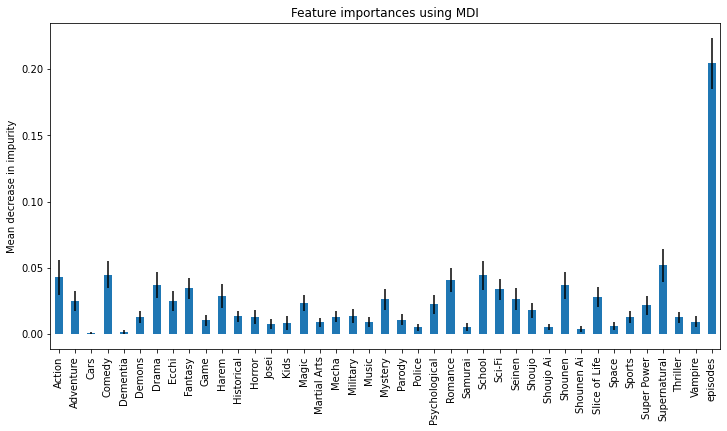

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from matplotlib.pyplot import figure
feature_df = multi_hot_df.drop(columns = ['members', 'average_rating'])

scaler = StandardScaler()
X_transformed_ft = scaler.fit_transform(feature_df.loc[:, feature_df.columns != 'popularity'].to_numpy())

feature_names = feature_df.columns[:-1]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_transformed_ft, feature_df['popularity'])

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, figsize=(12, 6))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

# fig.tight_layout()


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

log_reg_df = multi_hot_df.drop(columns = ['members', 'average_rating'])
X = log_reg_df.loc[:, log_reg_df.columns != 'popularity']
y = log_reg_df.loc[:, log_reg_df.columns == 'popularity']

X_transformed_log_reg = scaler.fit_transform(X)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_transformed_log_reg, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train_log, y_train_log)  # apply scaling on training data

print("Score for logistic regression: ")
pipe.score(X_test_log, y_test_log)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Score for logistic regression: 


0.8058823529411765

## K-means Clustering

KMeans(n_clusters=2)

KMeans(n_clusters=4)

KMeans(n_clusters=6)

KMeans()

KMeans(n_clusters=10)

KMeans(n_clusters=12)

KMeans(n_clusters=14)

KMeans(n_clusters=16)

KMeans(n_clusters=18)

KMeans(n_clusters=20)

KMeans(n_clusters=22)

KMeans(n_clusters=24)

KMeans(n_clusters=26)

KMeans(n_clusters=28)

KMeans(n_clusters=30)

KMeans(n_clusters=32)

KMeans(n_clusters=34)

KMeans(n_clusters=36)

KMeans(n_clusters=38)

KMeans(n_clusters=40)

Text(0.5, 0, 'k-values')

Text(0, 0.5, 'distortion')

Text(0.5, 1.0, 'Elbow curve')

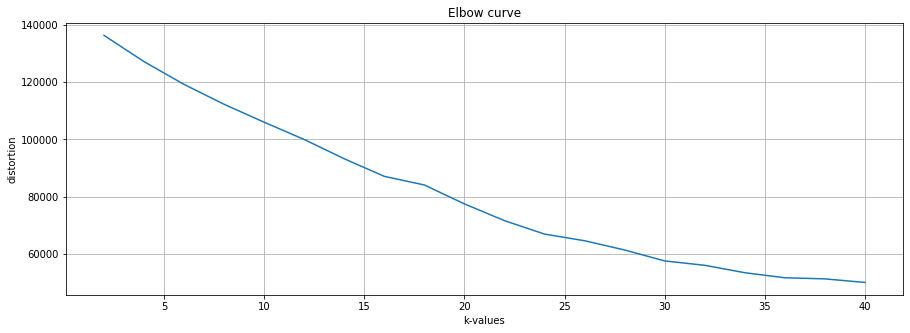

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

distorsions = []
for k in range(2, 42, 2):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_transformed)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 42, 2), distorsions)
plt.grid(True)
plt.xlabel('k-values')
plt.ylabel('distortion')
plt.title('Elbow curve')

In [ ]:
# Clustering with count of each cluster category
from collections import Counter
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_transformed)
Counter(kmeans.labels_)

Counter({0: 1381, 1: 527, 2: 1205, 3: 286})

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 2], dtype=int32)

In [ ]:
from sklearn import metrics
print("Rand index : ", metrics.rand_score(list(y.popularity), list(kmeans.labels_)))
print("Homogeneity Score : ", metrics.homogeneity_score(list(y.popularity), list(kmeans.labels_)))
print("Completeness Score : ", metrics.completeness_score(list(y.popularity), list(kmeans.labels_)))
print("Metrics Score: ", metrics.v_measure_score(list(y.popularity), list(kmeans.labels_)))

Rand index :  0.4397642487724032
Homogeneity Score :  0.06195434661863481
Completeness Score :  0.027555187621868912
Metrics Score:  0.0381448447822283


# Reccomendation System

In [ ]:
reg_df['cluster_labels'] = kmeans.labels_
reg_df

,name,genre,episodes,members,average_rating,cluster_labels
0,Naruto,"{Shounen, Comedy, Martial Arts, Action, Super ...",220,683297,7.81,0
25925,School Rumble,"{Shounen, Comedy, Romance, School}",26,178553,8.06,0
33078,Shuffle!,"{Comedy, Romance, Harem, Magic, Fantasy, Drama...",24,158772,7.31,0
40190,Elfen Lied,"{Romance, Psychological, Supernatural, Drama, ...",13,623511,7.85,3
67696,Girls Bravo: First Season,"{Comedy, Romance, Harem, Fantasy, Ecchi, School}",11,84395,6.69,0
...,...,...,...,...,...,...
5283591,"Kinyoru, Abe Reiji: Heikinteki na Salaryman no...",{Comedy},5,234,4.14,0
5283592,Yakyuubu Aruaru,{Sports},3,149,4.00,0
5283593,Ganbare-bu Next!,"{Comedy, Sports}",6,70,5.36,0
5283594,Pichiko Dakyuubu,"{Comedy, Sports}",29,39,5.00,0


In [ ]:
reg_df[reg_df.name == 'Cowboy Bebop']

,name,genre,episodes,members,average_rating,cluster_labels
3327283,Cowboy Bebop,"{Comedy, Sci-Fi, Drama, Space, Action, Adventure}",26,486824,8.82,1


In [ ]:
from collections import Counter

def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return sorted(key for key, value in ct.items() if value == max_value)

def flatten(my_list):
  return [item for sublist in my_list for item in sublist]

def recommender(anime_inputs):
  cluster_labels = []
  for anime in anime_inputs:
    row = reg_df.loc[reg_df['name'] == anime]
    # print(list(row['cluster_labels']))
    cluster_labels.append(list(row['cluster_labels']))
  
  cluster_labels = flatten(cluster_labels)
  print("Source clusters = ", cluster_labels)
  req_cluster = mode(cluster_labels)
  print("Cluster Number = ", req_cluster[0])

  filter = reg_df['cluster_labels'] == req_cluster[0]
  print()

  final_df = reg_df[filter].sort_values(by=['average_rating'], ascending=False)
  recommended_anime = list(final_df.name[0:10])
  print("Recommended anime: ", recommended_anime)
  return final_df[0:10]

recommender(['Cowboy Bebop', 'Doraemon', 'Elfen Lied'])

Source clusters =  [1, 2, 3]
Cluster Number =  1

Recommended anime:  ['Code Geass: Hangyaku no Lelouch R2', 'Code Geass: Hangyaku no Lelouch', 'Cowboy Bebop', 'Tengen Toppa Gurren Lagann', 'Uchuu Kyoudai', 'Kingdom 2nd Season', 'Ghost in the Shell: Stand Alone Complex 2nd GIG', 'Ghost in the Shell: Stand Alone Complex', 'Planetes', 'Space☆Dandy 2nd Season']


,name,genre,episodes,members,average_rating,cluster_labels
2932643,Code Geass: Hangyaku no Lelouch R2,"{Sci-Fi, Mecha, Drama, Action, Super Power, Mi...",25,572888,8.98,1
2869097,Code Geass: Hangyaku no Lelouch,"{Military, Sci-Fi, Mecha, Action, Super Power,...",25,715151,8.83,1
3327283,Cowboy Bebop,"{Comedy, Sci-Fi, Drama, Space, Action, Adventure}",26,486824,8.82,1
110079,Tengen Toppa Gurren Lagann,"{Comedy, Sci-Fi, Mecha, Action, Adventure}",27,562962,8.78,1
2313316,Uchuu Kyoudai,"{Comedy, Sci-Fi, Space, Seinen, Slice of Life}",99,72958,8.59,1
4167661,Kingdom 2nd Season,"{Action, Historical, Seinen, Military}",39,31234,8.57,1
4058407,Ghost in the Shell: Stand Alone Complex 2nd GIG,"{Mystery, Sci-Fi, Mecha, Seinen, Police, Actio...",26,113993,8.57,1
4051645,Ghost in the Shell: Stand Alone Complex,"{Sci-Fi, Mecha, Seinen, Police, Action, Military}",26,194491,8.47,1
4536019,Planetes,"{Sci-Fi, Romance, Seinen, Space, Drama}",26,105044,8.38,1
3506637,Space☆Dandy 2nd Season,"{Comedy, Sci-Fi, Space}",13,60918,8.27,1


In [ ]:
def plot_pie(lst):
  counts = Counter(lst)
  labels = []
  sizes = []

  for x, y in counts.items():
      labels.append(x)
      sizes.append(y)

  # Plot
  plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3)

  plt.axis('equal')
  plt.show()

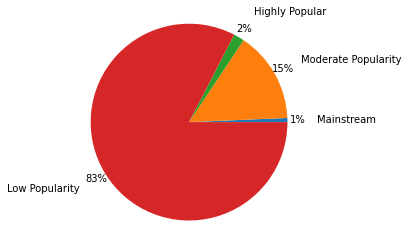

In [ ]:
plot_pie(y['popularity'])
plot_pie()

In [ ]:
len(list(kmeans.labels_)), len(list(y.popularity))

(3399, 3399)